# Практическая работа 3

### Импорт необходимых библиотек

In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

import scipy.stats as sts
from scipy.stats import shapiro
from scipy.stats import bartlett
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

## 1. Загрузить данные из файла “insurance.csv”. С помощью метода describe() посмотреть статистику по данным. Сделать выводы

In [2]:
insurance_data = pd.read_csv('insurance.csv', sep=',')

insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 3. Построить гистограммы для числовых показателей. Сделать выводы

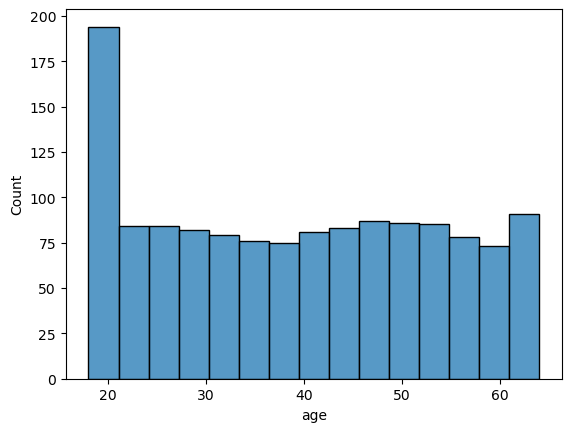

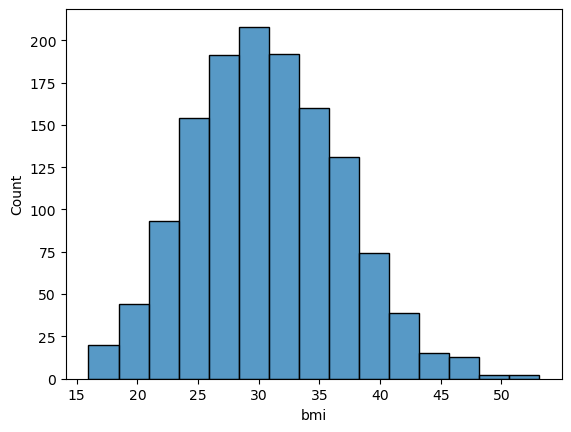

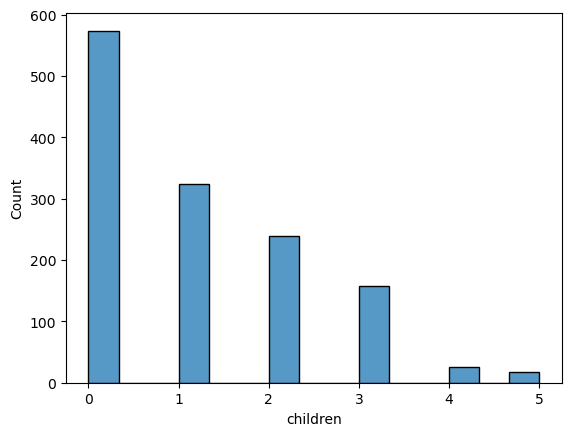

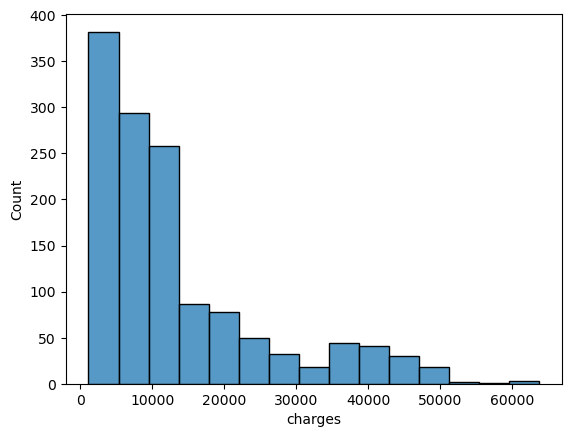

In [3]:

sns.histplot(insurance_data.age, bins =  15, kde = False)
plt.show()
sns.histplot(insurance_data.bmi, bins =  15, kde = False)
plt.show()
sns.histplot(insurance_data.children, bins =  15, kde = False)
plt.show()
sns.histplot(insurance_data.charges, bins =  15, kde = False)
plt.show()

## 4. Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges). Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики. Сделать выводы

Меры центральной тенденции:

    • Мода – это значение, которое наиболее часто встречается в выборке.

    • Медиана. Для нечетного количества элементов медиана равна центральному элементу в отсортированном массиве. Для четного количества элементов медиана равна среднему двух центральных элементов в отсортированном массиве.

    • Среднее – сумма значений всех элементов выборки, деленное на их количество.

Меры разброса:

    • Размах – разница между максимальным и минимальным значением выборки.

    • Стандартное отклонение – Это корень из дисперсии, которая вычисляется по формуле (∑(𝑥𝑖−𝑥̅)^2)/(𝑛−1), где 𝑥̅– это среднее выборки. Для генеральной совокупности такой показатель называется среднеквадратическим отклонением.

    • Межквартильный размах (IQR). Для всех выборок существуют такие отсечки, которые называются «квартили», их всего три: Q1, Q2 и Q3. Межквартильный размах – разность между Q3 (75%) и Q1 (25%), это ширина интервала, который содержит 50% данных.

In [5]:
# Меры центральной тенденции для индекса массы тела (bmi)
mean = np.mean(insurance_data.bmi)
moda = sts.mode(insurance_data.bmi, keepdims = False)  # Взять первый элемент moda[0], так как вывод это (mode=32.3, count=13)
med = np.median(insurance_data.bmi)

print('Мода bmi: ', moda)
print('Медиана bmi = %f' % med)
print('Среднее bmi = %f' % mean)

Мода bmi:  ModeResult(mode=32.3, count=13)
Медиана bmi = 30.400000
Среднее bmi = 30.663397


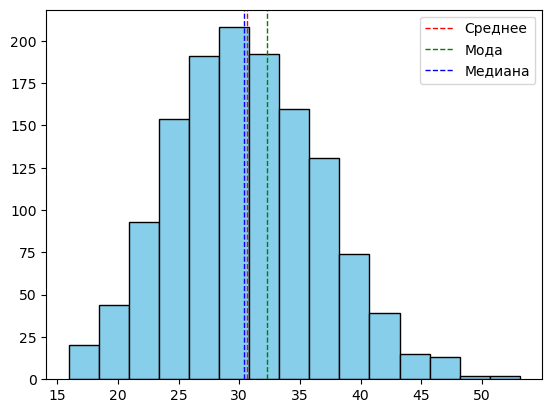

In [6]:
plt.hist(insurance_data.bmi, bins = 15, color = 'skyblue', edgecolor = 'black')
plt.axvline(mean, color = 'red', linestyle = 'dashed', linewidth = 1, label = 'Среднее')
plt.axvline(moda[0], color = 'green', linestyle = 'dashed', linewidth = 1, label = 'Мода')
plt.axvline(med, color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'Медиана')
plt.legend()
plt.show()

In [9]:
# Меры разброса для индекса массы тела (bmi)

std = insurance_data['bmi'].std()
raz = insurance_data['bmi'].max() - insurance_data['bmi'].min()
iqr = sts.iqr(insurance_data['bmi'], interpolation = 'midpoint' )

print('Стандартное отклонение bmi: ', std)
print('Размах bmi: ', raz)
print('Межквартильный размах через scipy bmi: ', iqr)


Стандартное отклонение bmi:  6.098186911679017
Размах bmi:  37.17
Межквартильный размах через scipy bmi:  8.384999999999998


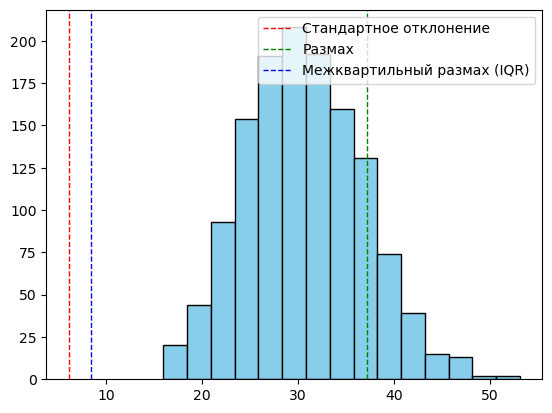

In [13]:
plt.hist(insurance_data.bmi, bins = 15, color = 'skyblue', edgecolor = 'black')
plt.axvline(std, color = 'red', linestyle = 'dashed', linewidth = 1, label = 'Стандартное отклонение')
plt.axvline(raz, color = 'green', linestyle = 'dashed', linewidth = 1, label = 'Размах')
plt.axvline(iqr, color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'Межквартильный размах (IQR)')
plt.legend()
plt.show()

In [14]:
# Меры центральной тенденции для расходов (charges)

mean = np.mean(insurance_data.charges)
moda = sts.mode(insurance_data.charges, keepdims=False)  # Взять первый элемент moda[0], так как вывод это (mode=32.3, count=13)
med = np.median(insurance_data.charges)

print('Среднее charges = %f' % mean)
print('Мода charges: ', moda)
print('Медиана charges = %f' % med)

Среднее charges = 13270.422265
Мода charges:  ModeResult(mode=1639.5631, count=2)
Медиана charges = 9382.033000


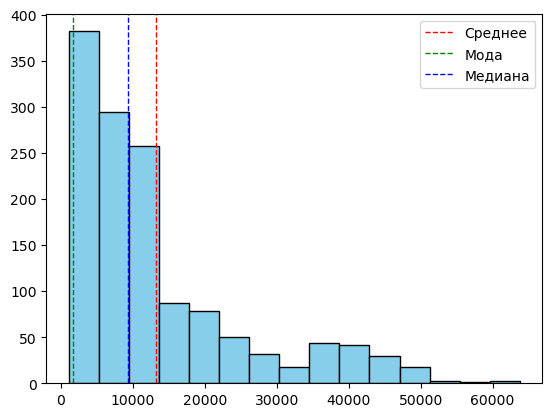

In [15]:
plt.hist(insurance_data.charges, bins=15, color='skyblue', edgecolor='black')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Среднее')
plt.axvline(moda[0], color='green', linestyle='dashed', linewidth=1, label='Мода')
plt.axvline(med, color='blue', linestyle='dashed', linewidth=1, label='Медиана')
plt.legend()
plt.show()

In [16]:
# Меры разброса для расходов (charges)

std = insurance_data['charges'].std()
raz = insurance_data['charges'].max() - insurance_data['charges'].min()
iqr = sts.iqr(insurance_data['charges'], interpolation = 'midpoint' )

print('Стандартное отклонение charges: ', std)
print('Размах charges: ', raz)
print('Межквартильный размах через scipy charges: ', iqr)

Стандартное отклонение charges:  12110.011236693994
Размах charges:  62648.554110000005
Межквартильный размах через scipy charges:  11879.80148


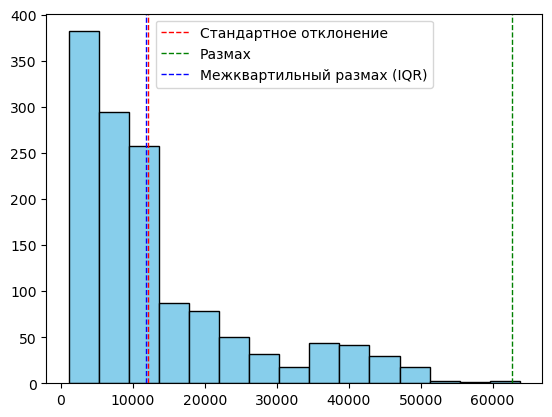

In [17]:
plt.hist(insurance_data.charges, bins = 15, color = 'skyblue', edgecolor = 'black')
plt.axvline(std, color = 'red', linestyle = 'dashed', linewidth = 1, label = 'Стандартное отклонение')
plt.axvline(raz, color = 'green', linestyle = 'dashed', linewidth = 1, label = 'Размах')
plt.axvline(iqr, color = 'blue', linestyle = 'dashed', linewidth = 1, label = 'Межквартильный размах (IQR)')
plt.legend()
plt.show()

## 5. Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы

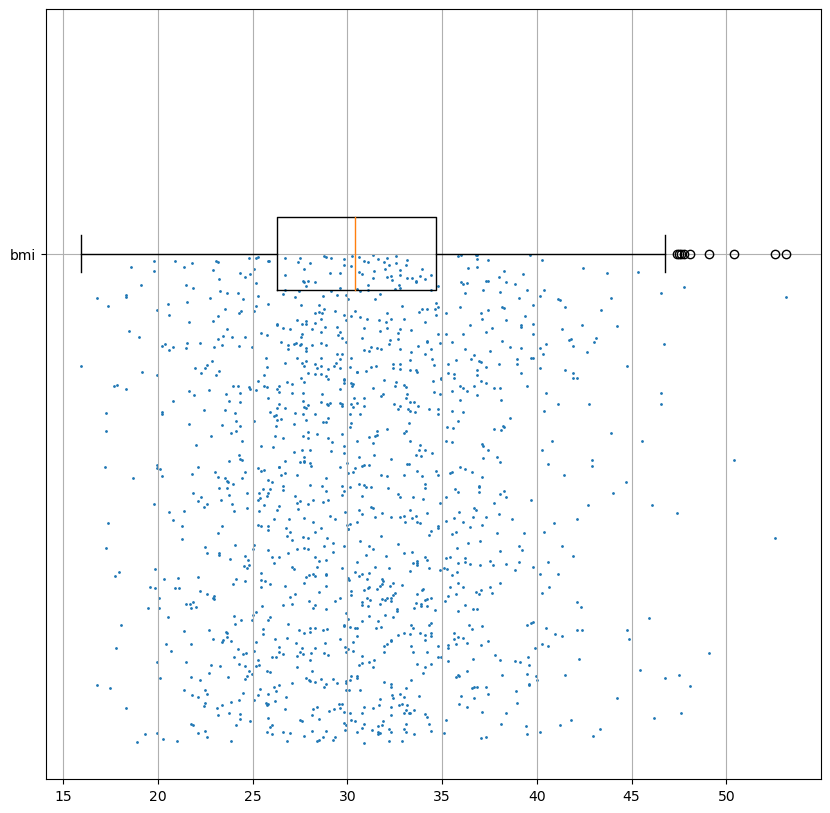

In [18]:
# box-plot для bmi
rand_bmi = np.random.rand(len(insurance_data['bmi']))

plt.figure(figsize = (10, 10))
plt.boxplot([insurance_data['bmi']], labels = ['bmi'], vert=False)
plt.scatter(insurance_data['bmi'], rand_bmi, s = 1)
plt.grid()
plt.show()

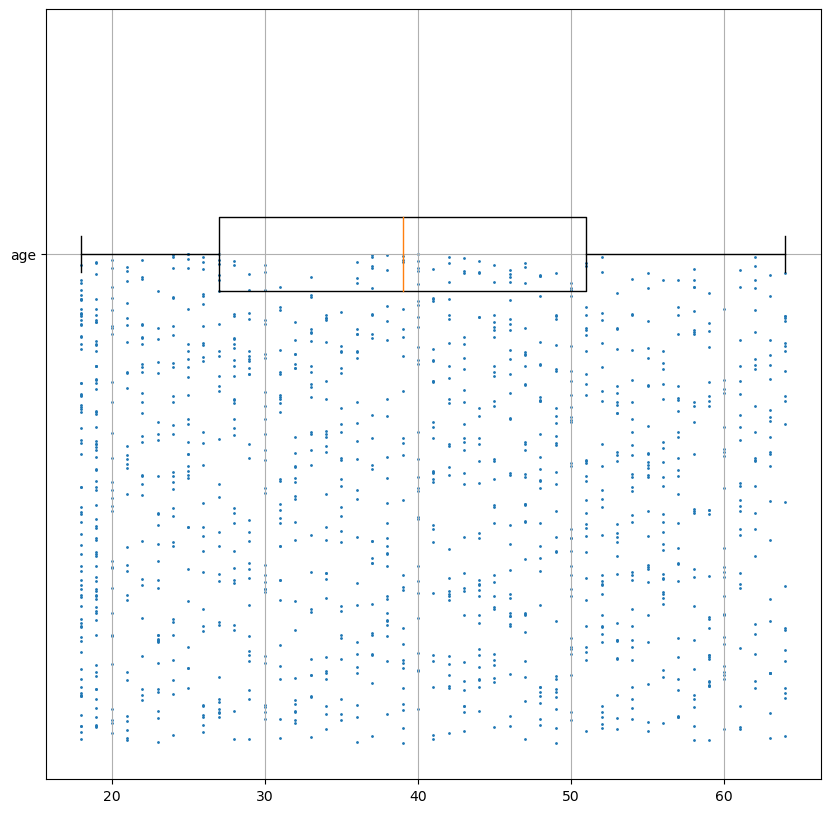

In [19]:
# box-plot для age
import numpy as np


rand_age = np.random.rand(len(insurance_data['age']))

plt.figure(figsize = (10, 10))
plt.boxplot([insurance_data['age']], labels = ['age'], vert=False)
#plt.yticks(np.arange(0,105,5))
plt.scatter(insurance_data['age'], rand_age, s = 1)
plt.grid()
plt.show()

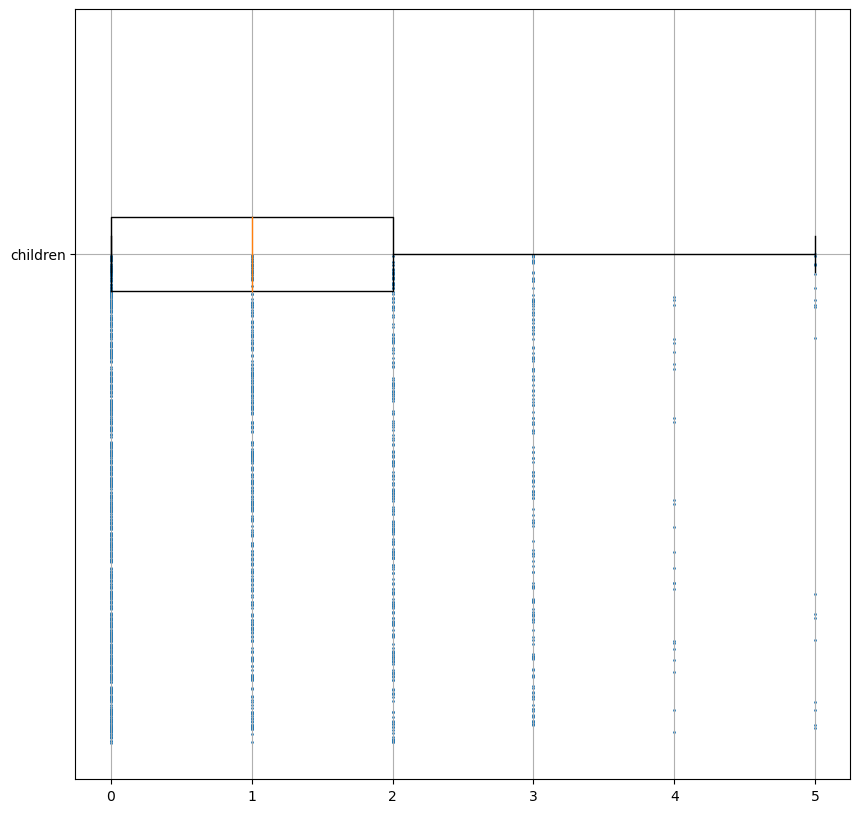

In [20]:
# box-plot для children
import numpy as np


rand_children = np.random.rand(len(insurance_data['children']))

plt.figure(figsize = (10, 10))
plt.boxplot([insurance_data['children']], labels = ['children'], vert=False)
#plt.yticks(np.arange(0,105,5))
plt.scatter(insurance_data['children'], rand_children, s = 1)
plt.grid()
plt.show()

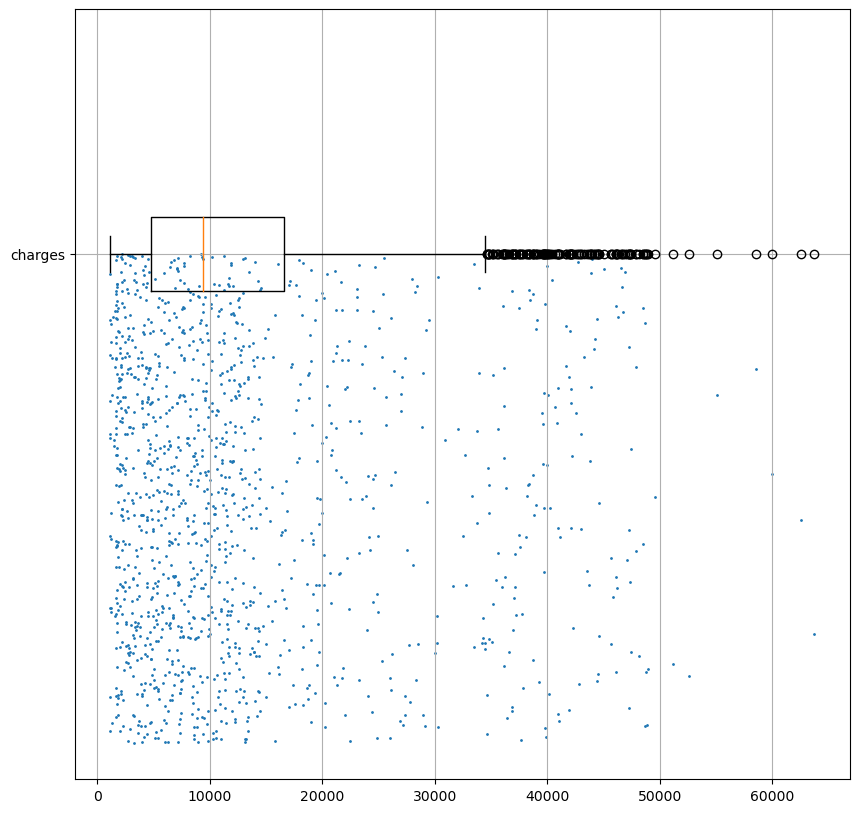

In [21]:
# box-plot для charges
import numpy as np


rand_charges = np.random.rand(len(insurance_data['charges']))

plt.figure(figsize = (10, 10))
plt.boxplot([insurance_data['charges']], labels = ['charges'], vert=False)
#plt.yticks(np.arange(0,105,5))
plt.scatter(insurance_data['charges'], rand_charges, s = 1)
plt.grid()
plt.show()

<Axes: >

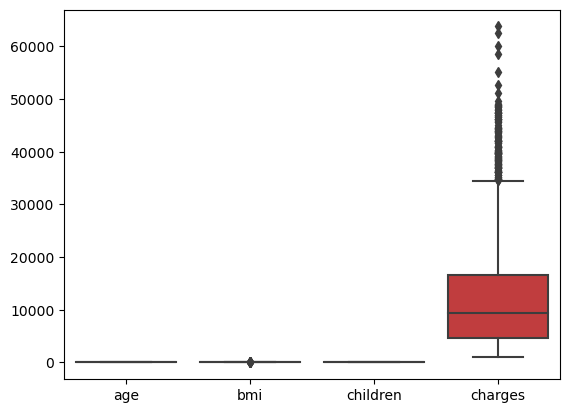

In [22]:
# box-plot для всего
sns.boxplot(insurance_data)

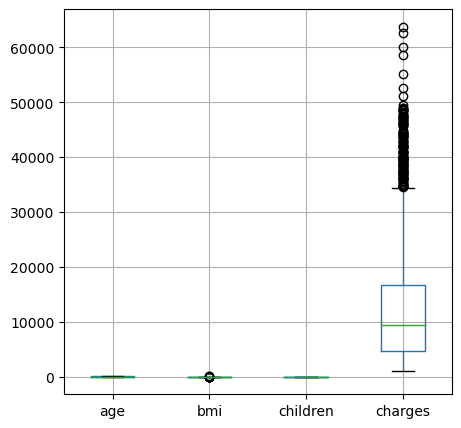

In [23]:
# box-plot для всего
plt.figure(figsize = (5,5))
insurance_data.boxplot()
plt.show()

## 6. Используя признак charges или imb, проверить, выполняется ли центральная предельная теорема. Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений. Сделать выводы


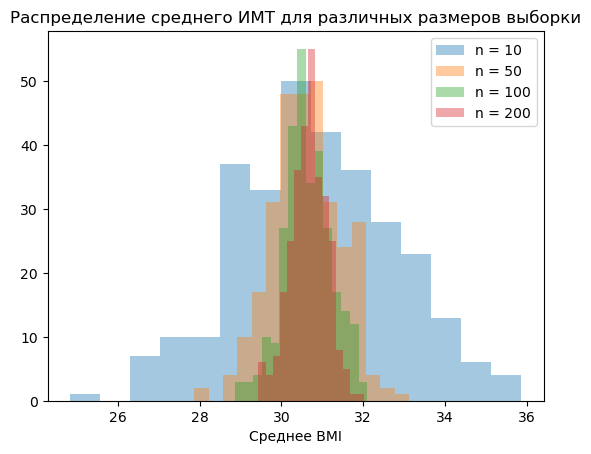


Размер выборки: 10
Среднее BMI: 30.85
Стандартное отклонение: 5.75

Размер выборки: 50
Среднее BMI: 30.61
Стандартное отклонение: 6.00

Размер выборки: 100
Среднее BMI: 30.63
Стандартное отклонение: 6.02

Размер выборки: 200
Среднее BMI: 30.66
Стандартное отклонение: 6.09


In [38]:
def generate_samples(n):
    samples = []
    for i in range(300):
        sample = np.random.choice(insurance_data['bmi'], size = n)
        samples.append(sample)
    return samples


sample_lengths = [10, 50, 100, 200]
means = []
stds = []

for n in sample_lengths:
    samples = generate_samples(n)
    means.append([np.mean(sample) for sample in samples])
    stds.append([np.std(sample) for sample in samples])
    plt.hist([np.mean(sample) for sample in samples], bins = 15, alpha = 0.4, label = f'n = {n}')

plt.legend()
plt.xlabel('Среднее BMI')
plt.title('Распределение среднего ИМТ для различных размеров выборки')
plt.show()

for i in range(len(sample_lengths)):
    print(f'\nРазмер выборки: {sample_lengths[i]}')
    print(f'Среднее BMI: {np.mean(means[i]):.2f}')
    print(f'Стандартное отклонение: {np.mean(stds[i]):.2f}')

## 7. Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела

In [39]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



* Для расходов "charges":

    Доверительный интервал (95%): среднее значение charges +- 1.96*(стандартное отклонение charges / корень из количества наблюдений)

    Доверительный интервал (99%): среднее значение charges +- 2.58*(стандартное отклонение charges / корень из количества наблюдений)

* Для индекса массы тела "bmi":

    Доверительный интервал (95%): среднее значение bmi +- 1.96*(стандартное отклонение bmi / корень из количества наблюдений)

    Доверительный интервал (99%): среднее значение bmi +- 2.58*(стандартное отклонение bmi / корень из количества наблюдений)


In [41]:

CI_95_bmi_left = np.mean(insurance_data.bmi) - 1.96*(insurance_data['bmi'].std()/math.sqrt(insurance_data['bmi'].count()))
CI_95_bmi_right = np.mean(insurance_data.bmi) + 1.96*(insurance_data['bmi'].std()/math.sqrt(insurance_data['bmi'].count()))
print('Доверительный интервал bmi (95%): ', CI_95_bmi_left, CI_95_bmi_right)

CI_99_bmi_left = np.mean(insurance_data.bmi) - 2.58*(insurance_data['bmi'].std()/math.sqrt(insurance_data['bmi'].count()))
CI_99_bmi_right = np.mean(insurance_data.bmi) + 2.58*(insurance_data['bmi'].std()/math.sqrt(insurance_data['bmi'].count()))
print('Доверительный интервал bmi (99%): ', CI_99_bmi_left, CI_99_bmi_right)

CI_95_charges_left = np.mean(insurance_data.charges) - 1.96*(insurance_data['charges'].std()/math.sqrt(insurance_data['charges'].count()))
CI_95_charges_right = np.mean(insurance_data.charges) + 1.96*(insurance_data['charges'].std()/math.sqrt(insurance_data['charges'].count()))
print('Доверительный интервал charges (95%): ', CI_95_charges_left, CI_95_charges_right)

CI_99_charges_left = np.mean(insurance_data.charges) - 2.58*(insurance_data['charges'].std()/math.sqrt(insurance_data['charges'].count()))
CI_99_charges_right = np.mean(insurance_data.charges) + 2.58*(insurance_data['charges'].std()/math.sqrt(insurance_data['charges'].count()))
print('Доверительный интервал charges (99%): ', CI_99_charges_left, CI_99_charges_right)

Доверительный интервал bmi (95%):  30.336636967245095 30.990156754728
Доверительный интервал bmi (99%):  30.233274143714635 31.093519578258462
Доверительный интервал charges (95%):  12621.53005468252 13919.314475599993
Доверительный интервал charges (99%):  12416.268233006796 14124.576297275717


## 8. Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы. Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot. Сделать выводы на основе полученных p-значений

In [43]:
# Нулевая гипотеза (H0): Распределение признака является нормальным.
# Альтернативная гипотеза (H1): Распределение признака не является нормальным.
bmi_col = insurance_data.bmi
charges_data = insurance_data.charges

bmi_ks_test = sts.kstest(bmi_col, 'norm')
charges_ks_test = sts.kstest(charges_data, 'norm')

print("KS-тест для bmi:", bmi_ks_test)
print("KS-тест для charges:",charges_ks_test)

KS-тест для bmi: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=15.96, statistic_sign=-1)
KS-тест для charges: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1121.8739, statistic_sign=-1)


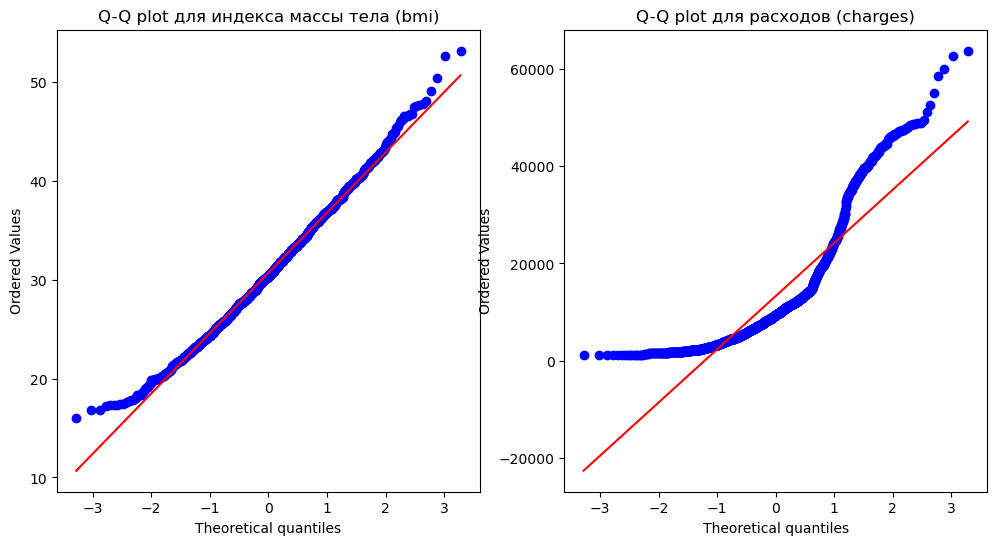

In [44]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sts.probplot(bmi_col, dist = "norm", plot = plt)
plt.title("Q-Q plot для индекса массы тела (bmi)")
plt.subplot(1, 2, 2)
sts.probplot(charges_data, dist = "norm", plot = plt)
plt.title("Q-Q plot для расходов (charges)")
plt.show()


Правый график показывает, что распределение исследуемой выборки сильно отличается от нормального.
На левом графике середина распределения следует нормальному закону, но его концы отклоняются от него.

Если полученные p-значения меньше выбранного уровня значимости (обычно 0.05), то нулевая гипотеза отвергается,
и можно сделать вывод, что распределение признака не является нормальным. В противном случае, нулевая гипотеза
не может быть отвергнута, и можно считать распределение признака нормальным.

## 9. Загрузить данные из файла “ECDCCases.csv”

In [45]:
ecdc_data = pd.read_csv('ECDCCases.csv', sep=',')

In [46]:
ecdc_data.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.178100e+04,59025.000000
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.098628e+07,66.316369
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.531246e+08,162.324550
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.561206
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


## 10. Проверить в данных наличие пропущенных значений. Вывести количество пропущенных значений в процентах. Удалить два признака, в которых больше всех пропущенных значений. Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию (например, «other»), для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в данных нет

In [51]:
missing_values = ecdc_data.isnull().sum()
percentage_missing = (missing_values / len(insurance_data)) * 100

for column in ecdc_data.columns:
    missing = np.mean(ecdc_data[column].isna()*100)
    print(f" {column} : {round(missing,1)}%")

 dateRep : 0.0%
 day : 0.0%
 month : 0.0%
 year : 0.0%
 cases : 0.0%
 deaths : 0.0%
 countriesAndTerritories : 0.0%
 geoId : 0.4%
 countryterritoryCode : 0.2%
 popData2019 : 0.2%
 continentExp : 0.0%
 Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 : 4.7%


In [52]:
columns_to_drop = missing_values.nlargest(2).index
ecdc_data = ecdc_data.drop(columns_to_drop, axis=1)


ecdc_data = ecdc_data.fillna(value = 'other')
ecdc_data = ecdc_data.fillna(value = ecdc_data.median())


missing_values = ecdc_data.isnull().sum()
print(missing_values)

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64


C:\Users\MISQZY\AppData\Local\Temp\ipykernel_13404\2792439916.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ecdc_data = ecdc_data.fillna(value = ecdc_data.median())


## 11. Посмотреть статистику по данным, используя describe(). Сделать выводы о том, какие признаки содержат выбросы. Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

Обычно выбросы могут быть обнаружены по следующим признакам:

 * Большое значение максимального значения (которое значительно отличается от среднего и медианы).

 * Большое значение стандартного отклонения (которое указывает на большую вариацию данных).

In [53]:
print(ecdc_data.describe(), '\n')


filtered_ECDC = ecdc_data[ecdc_data['deaths'] > 3000]

count_by_country = filtered_ECDC['countriesAndTerritories'].value_counts()

print(count_by_country)

iqr_day = sts.iqr(ecdc_data['day'], interpolation = 'midpoint')
iqr_month = sts.iqr(ecdc_data['month'], interpolation = 'midpoint')
iqr_cases = sts.iqr(ecdc_data['cases'], interpolation = 'midpoint')
iqr_deaths = sts.iqr(ecdc_data['deaths'], interpolation = 'midpoint')

print('iqr_day:', iqr_day*2.5, 'max_day', ecdc_data['day'].max())
print('iqr_month:', iqr_month*2.5, 'max_month', ecdc_data['month'].max())
print('iqr_cases:', iqr_cases*2.5, 'max_cases', ecdc_data['cases'].max())
print('iqr_deaths:', iqr_deaths*2.5, 'max_deaths', ecdc_data['deaths'].max())

                day         month          year          cases        deaths
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987
std        8.841624      2.954816      0.032881    6779.010824    131.222948
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000
25%        8.000000      5.000000   2020.000000       0.000000      0.000000
50%       15.000000      7.000000   2020.000000      15.000000      0.000000
75%       23.000000     10.000000   2020.000000     273.000000      4.000000
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000 

United_States_of_America    6
Peru                        2
Argentina                   1
Ecuador                     1
Mexico                      1
Name: countriesAndTerritories, dtype: int64
iqr_day: 37.5 max_day 31
iqr_month: 12.5 max_month 12
iqr_cases: 682.5 max_cases 234633
iqr_deaths: 10.0 max_de

Стандартное отклонение (std) для признаков "cases" и "deaths" составляет 6779.010824 и 131.222948 соответственно.

Максимальное значение для "cases" равно 234633, а для "deaths" равно 4928.

Минимальные значения для обоих признаков отрицательны, что может быть необычным для количественных данных о случаях и смертях.

Признаки "cases" и "deaths" содержат выбросы, так как максимальные значения превышают верхнюю границу выбросов,
определенную по интерквартильному размаху.

## 12. Найти дублирование данных. Удалить дубликаты.

In [54]:
duplicates = ecdc_data.duplicated()
print(duplicates)
ecdc_data.drop_duplicates(inplace = True)
duplicates = ecdc_data.duplicated()
print(duplicates)

0        False
1        False
2        False
3         True
4        False
         ...  
61899    False
61900    False
61901    False
61902    False
61903    False
Length: 61904, dtype: bool
0        False
1        False
2        False
4        False
5        False
         ...  
61899    False
61900    False
61901    False
61902    False
61903    False
Length: 61900, dtype: bool


## 13. Загрузить данные из файла “bmi.csv”. Взять оттуда две выборки. Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest. Сравнить средние значения этих выборок, используя t-критерий Стьюдента. Предварительно проверить выборки на нормальность (критерий ШопироУилка) и на гомогенность дисперсии (критерий Бартлетта)

In [56]:
bmi_data = pd.read_csv("bmi.csv", sep=',')

northwest_data = bmi_data[bmi_data["region"] == "northwest"]["bmi"]
southwest_data = bmi_data[bmi_data["region"] == "southwest"]["bmi"]


stat_northwest, p_value_northwest = shapiro(northwest_data)
print("\nПроверка выборки для региона northwest на нормальность – критерий ШопироУилка:")
print("• Статистика для выборки northwest:", stat_northwest)
print("• p-значение для выборки northwest:", p_value_northwest)

stat_southwest, p_value_southwest = shapiro(southwest_data)
print("\nПроверка выборки для региона southwest на нормальность – критерий ШопироУилка:")
print("• Статистика для выборки southwest:", stat_southwest)
print("• p-значение для выборки southwest:", p_value_southwest)



statistic, p_value = bartlett(northwest_data, southwest_data)
print("\nПроверка выборок на гомогенность дисперсии – критерий Бартлетта:")
print("• Статистика для проверки гомогенности дисперсии:", statistic)
print("• p-значение для проверки гомогенности дисперсии:", p_value)



statistic, p_value = ttest_ind(northwest_data, southwest_data)
print("\nСравнение средних значений выборок – t-критерий Стьюдента:")
print("• Статистика для сравнения выборок:", statistic)
print("• p-значение для сравнения выборок:", p_value)


Проверка выборки для региона northwest на нормальность – критерий ШопироУилка:
• Статистика для выборки northwest: 0.9954646825790405
• p-значение для выборки northwest: 0.4655335247516632

Проверка выборки для региона southwest на нормальность – критерий ШопироУилка:
• Статистика для выборки southwest: 0.9949268698692322
• p-значение для выборки southwest: 0.3629520535469055

Проверка выборок на гомогенность дисперсии – критерий Бартлетта:
• Статистика для проверки гомогенности дисперсии: 3.4000745256463825
• p-значение для проверки гомогенности дисперсии: 0.06519347353580048

Сравнение средних значений выборок – t-критерий Стьюдента:
• Статистика для сравнения выборок: -3.2844171500398582
• p-значение для сравнения выборок: 0.001076958496307695


## 14. Кубик бросили 600 раз, получили следующие результаты: N 1 2 3 4 5 6 Количество выпадений 97 98 109 95 97 104. 
## С помощью критерия Хи-квадрат проверить, является ли полученное распределение равномерным. Использовать функцию scipy.stats.chisquare().

In [57]:
observed = [97, 98, 109, 95, 97, 104]  # Наблюдаемые значения
expected = [100, 100, 100, 100, 100, 100]  # Ожидаемые значения (равномерное распределение)

chi2, p = sts.chisquare(observed, expected)

print("Статистика критерия Хи-квадрат:", chi2)
print("p-значение:", p)

Статистика критерия Хи-квадрат: 1.44
p-значение: 0.9198882077437889


Ожидаемые значения равномерно распределены, поэтому для каждого значения мы используем 100 (600 / 6)

Функция scipy.stats.chisquare() возвращает статистику критерия Хи-квадрат и p-значение

p-значение больше заданного уровня значимости (обычно 0.05); мы можем отклонить H1 в пользу H0

## 15. С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми. Создать датафрейм, используя следующий код:

In [58]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1], 'Гражданский брак': [80,22,20,35,6,4],
                     'Не состоит в отношениях': [35,44,35,6,8,22]})
data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает',
              'На домохозяйстве', 'На пенсии', 'Учёба']
data.head()

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8


### Использовать функцию scipy.stats.chi2_contingency(). Влияет ли семейное положение на занятость?

In [61]:
chi2, p_value, dof, expected = chi2_contingency(data)

if p_value < 0.05:
    print("Результат: Семейное положение влияет на занятость")
else:
    print("Результат: Семейное положение не влияет на занятость")

Результат: Семейное положение влияет на занятость
